In [1]:
import sys
import os
%matplotlib inline
sys.path.append(os.path.abspath('../src'))
from model_training import train_model, get_untrained_custom_model, plot_training_history
from utils import save_model, load_data, test_gpu

2024-08-19 15:39:10.464301: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#making sure the gpu is available
test_gpu()

Num GPUs Available:  1


2024-08-19 15:39:11.914493: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-08-19 15:39:12.905280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-19 15:39:12.905365: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-08-19 15:39:12.905391: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-08-19 15:39:12.909729: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-19 15:39:12.909867: I tensorflow/str

In [3]:
train_data_path = '../datasets/ready/train/'
val_data_path = '../datasets/ready/val/'

#loading the datasets
x_train = load_data(train_data_path+"x_train.csv")
y_train = load_data(train_data_path+"y_train.csv")
x_val = load_data(val_data_path+"/x_val.csv")
y_val = load_data(val_data_path+"/y_val.csv")

In [4]:
save_path = '../models/model.h5'
# Setting up hyperparameters
batch_size = 128
epochs = 256

optimizer='adam'
loss='binary_crossentropy' 
metrics=['accuracy']

In [5]:
# Getting the model
model = get_untrained_custom_model(optimizer=optimizer, loss=loss, metrics=metrics, x_train=x_train)

2024-08-19 15:39:14.698765: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-19 15:39:14.700968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-19 15:39:14.701012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-08-19 15:39:14.701047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node

In [6]:
#traingin the random forest model 
history = train_model(model, x_train, y_train, epochs, x_val, y_val, batch_size)

2024-08-19 15:39:16.506886: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-19 15:39:16.507333: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2496000000 Hz


Epoch 1/256


2024-08-19 15:39:16.932083: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


1/3 [=========>....................] - ETA: 3s - loss: 0.6932 - accuracy: 0.4844

2024-08-19 15:39:18.202962: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-08-19 15:39:18.203136: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 2s 131ms/step - loss: 0.6934 - accuracy: 0.4743 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 2/256
3/3 [==============================] - 0s 34ms/step - loss: 0.6918 - accuracy: 0.5143 - val_loss: 0.6912 - val_accuracy: 0.6000
Epoch 3/256
3/3 [==============================] - 0s 24ms/step - loss: 0.6847 - accuracy: 0.7457 - val_loss: 0.6866 - val_accuracy: 0.6667
Epoch 4/256
3/3 [==============================] - 0s 22ms/step - loss: 0.6625 - accuracy: 0.9857 - val_loss: 0.6707 - val_accuracy: 0.6133
Epoch 5/256
3/3 [==============================] - 0s 28ms/step - loss: 0.6086 - accuracy: 0.9857 - val_loss: 0.6378 - val_accuracy: 0.6133
Epoch 6/256
3/3 [==============================] - 0s 22ms/step - loss: 0.4981 - accuracy: 0.9943 - val_loss: 0.5918 - val_accuracy: 0.6133
Epoch 7/256
3/3 [==============================] - 0s 25ms/step - loss: 0.3404 - accuracy: 0.9971 - val_loss: 0.5642 - val_accuracy: 0.6800
Epoch 8/256
3/3 [==============

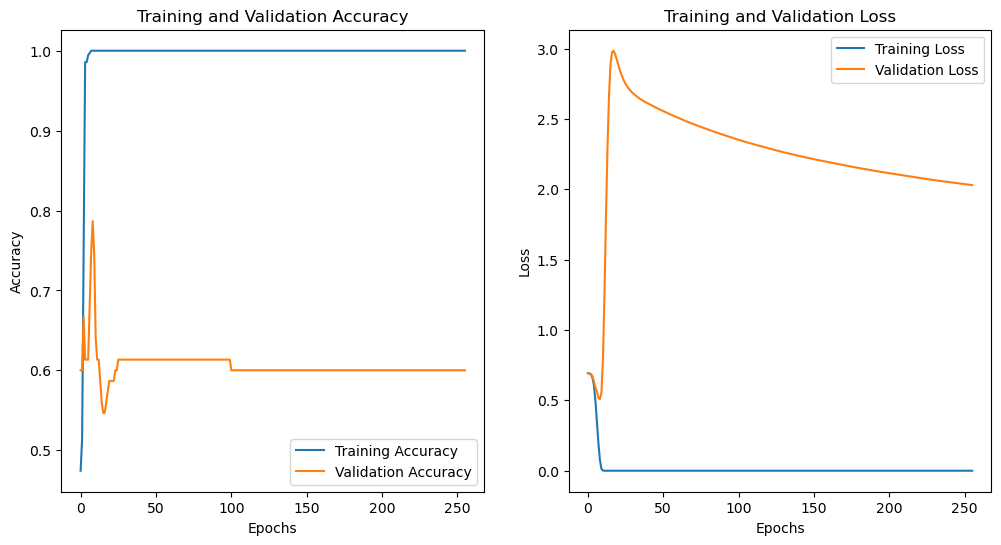

In [7]:
# Get predictions on the training data
plot_training_history(history)

In [8]:
# Saving the model
save_model(model, save_path)